<h1>Fourier Transform</h1>

This notebook illustrates how the Fast Fourier Transform (FFT) is generally used in Python.<br>
It was built for the following article on Medium:

The notebook
- Models the sinc function
- Visualizes the integrand of the FFT at different frequencies
- Plots the FFT of the sinc function
- Shows that the FFT can be reversed back to the original function

$$\begin{equation}
F(\xi) = \int_{-\infty}^{\infty} f(x)e^{-2 \pi ix \xi} \cdot dx
\end{equation}$$

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''
n: Number of data points to represent the input space of our sample function
t: The data points themselves, ranging from -pi to pi.
'''

n = 10000
t = np.linspace(-np.pi, np.pi, n)

In [3]:
'''
The sample function in this notebook is the product of a cos function with an exp: fn
fn_integrand is the integrand of the Fourier Transform i.e. the wave at a particular frequency value
'''

def fn(x):
    return np.cos(2 * np.pi * 3 * x) * np.exp(-np.pi * x * x)

def fn_integrand(x):
    return np.exp(-2 * np.pi * 1j * (freq * x)) * fn(x)

fn_t = np.apply_along_axis(fn, 0, t)

<IPython.core.display.Javascript object>


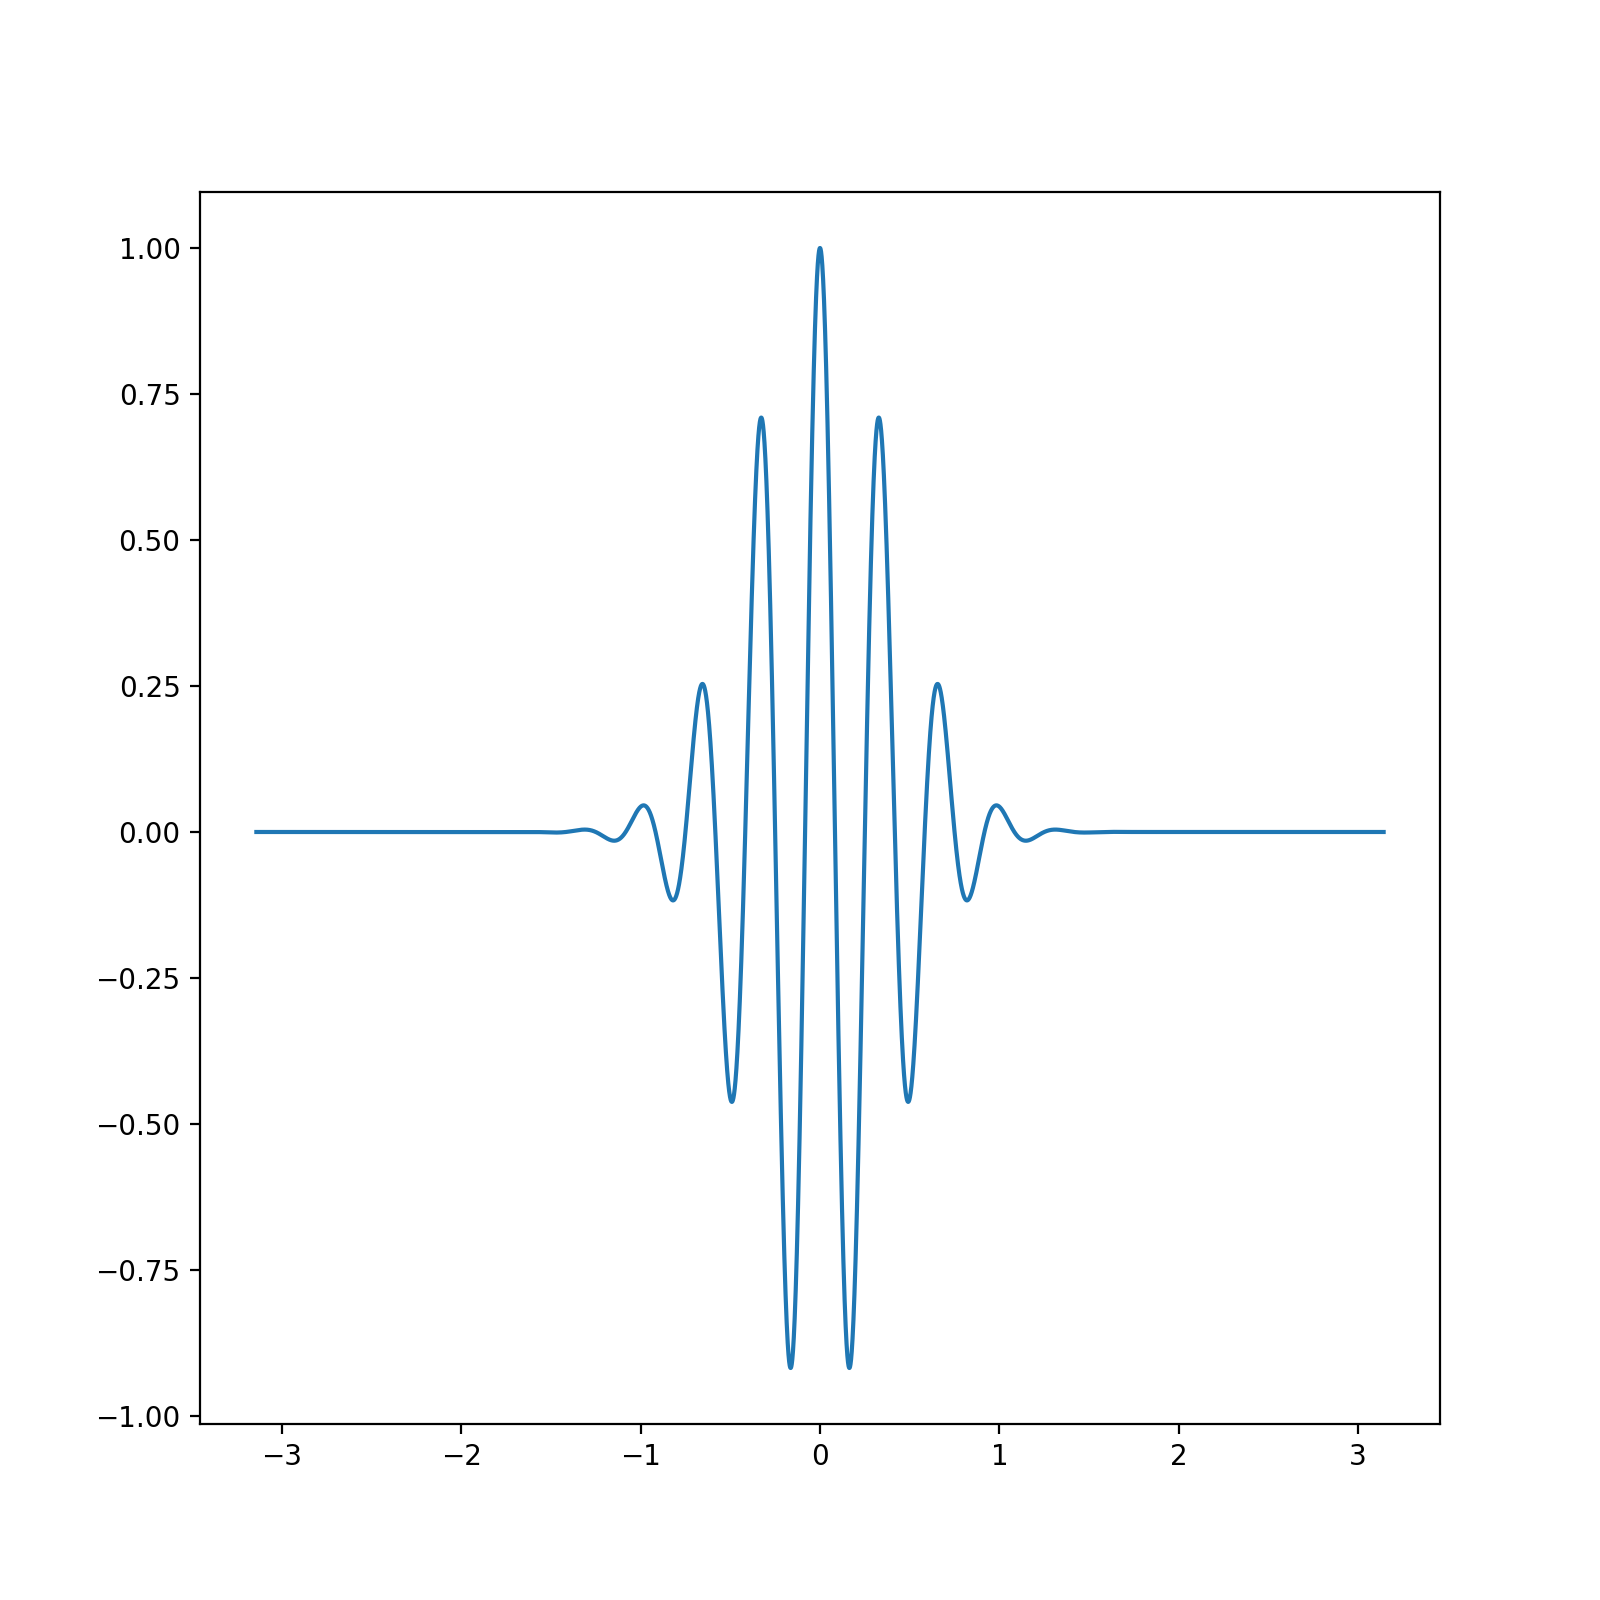

In [4]:
fig= plt.figure(figsize=(8,8))
plt.plot(t, fn_t.real)

plt.show()

<IPython.core.display.Javascript object>


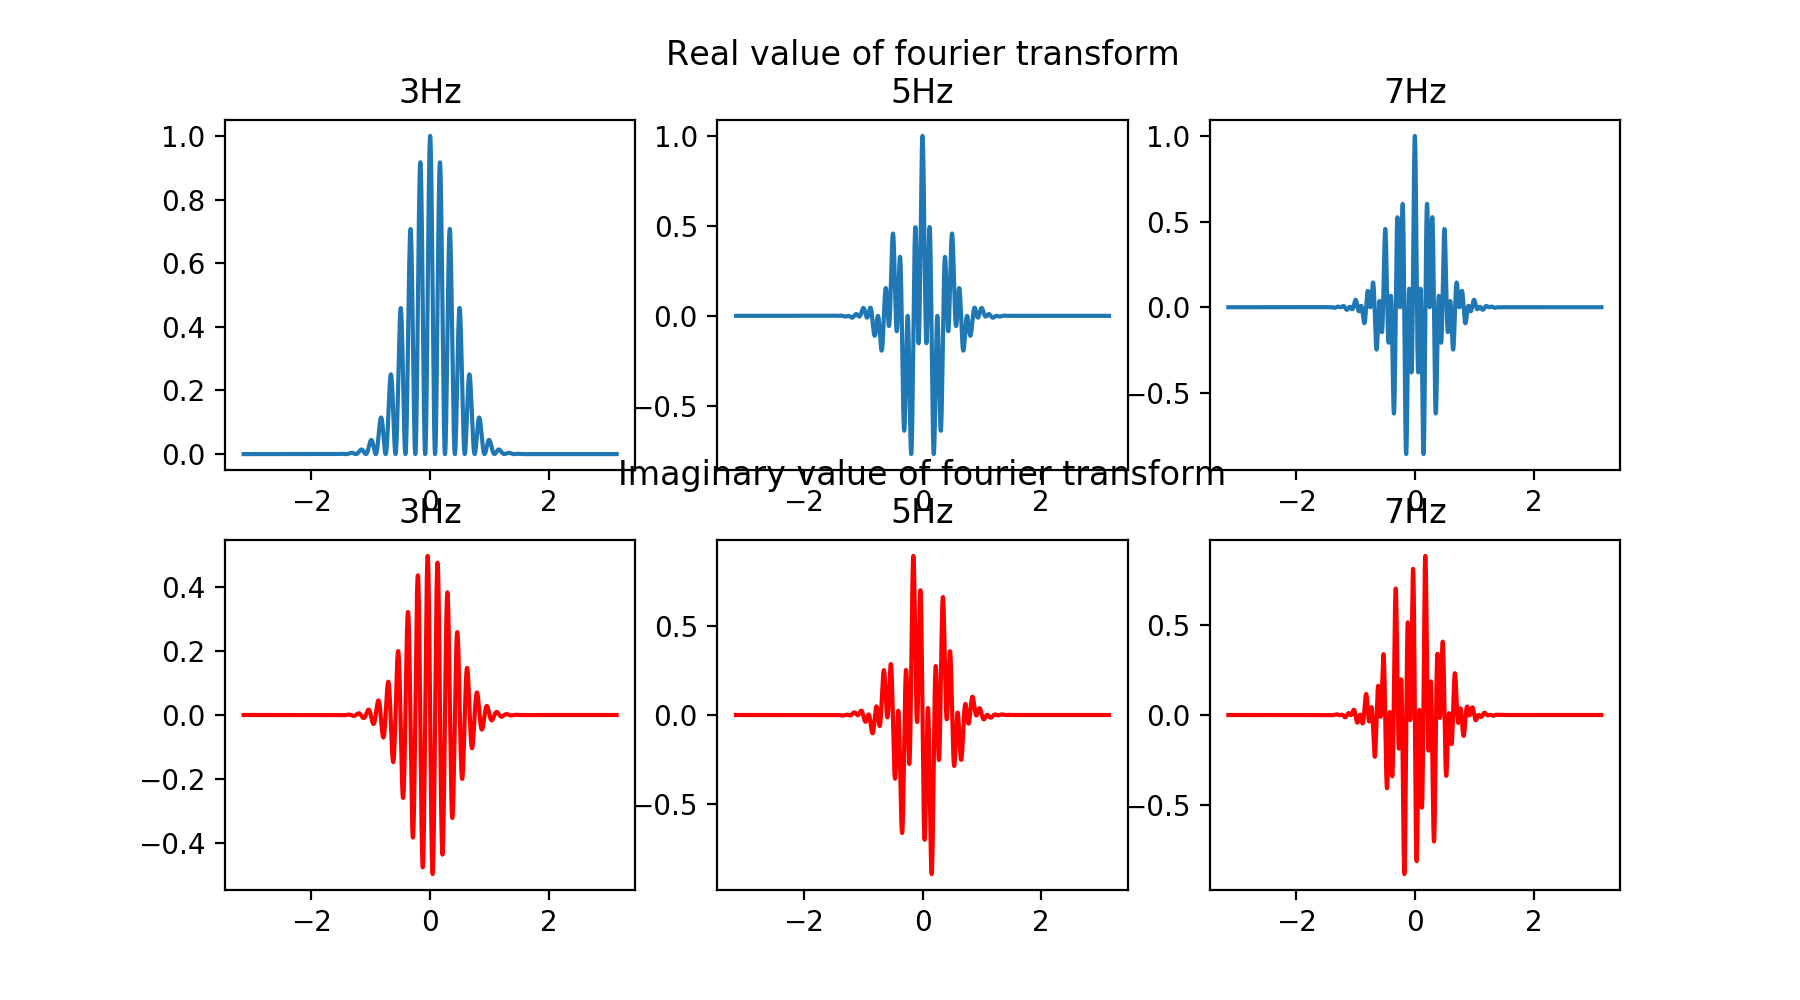

In [5]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(9,5))

freq = 3
fn_integrand1 = np.apply_along_axis(fn_integrand, 0, t)
ax1.plot(t, fn_integrand1.real)
ax1.set_title("\n3Hz")
ax4.plot(t, fn_integrand1.imag, color="r")
ax4.set_title("\n3Hz")

freq = 5
fn_integrand2 = np.apply_along_axis(fn_integrand, 0, t)
ax2.plot(t, fn_integrand2.real)
ax2.set_title("Real value of fourier transform integrand with frequency of\n5Hz")
ax5.plot(t, fn_integrand2.imag, color="r")
ax5.set_title("Imaginary value of fourier transform integrand with the frequency of\n5Hz")

freq = 7

fn_integrand3 = np.apply_along_axis(fn_integrand, 0, t)
ax3.plot(t, fn_integrand3.real)
ax3.set_title("\n7Hz")
ax6.plot(t, fn_integrand3.imag, color="r")
ax6.set_title("\n7Hz")

plt.show()

$$\begin{equation}
X_{k} = \sum_{n=0}^{N-1} x_{n}e^{-2 \pi ikn/N}
\end{equation}$$
$$\begin{equation}
k = 0, ..., N-1
\end{equation}$$

[1.68031882e-13 1.55400871e-12 2.45301042e-11 ... 1.28160880e-18
 5.29050059e-19 4.56914287e-19]


<IPython.core.display.Javascript object>


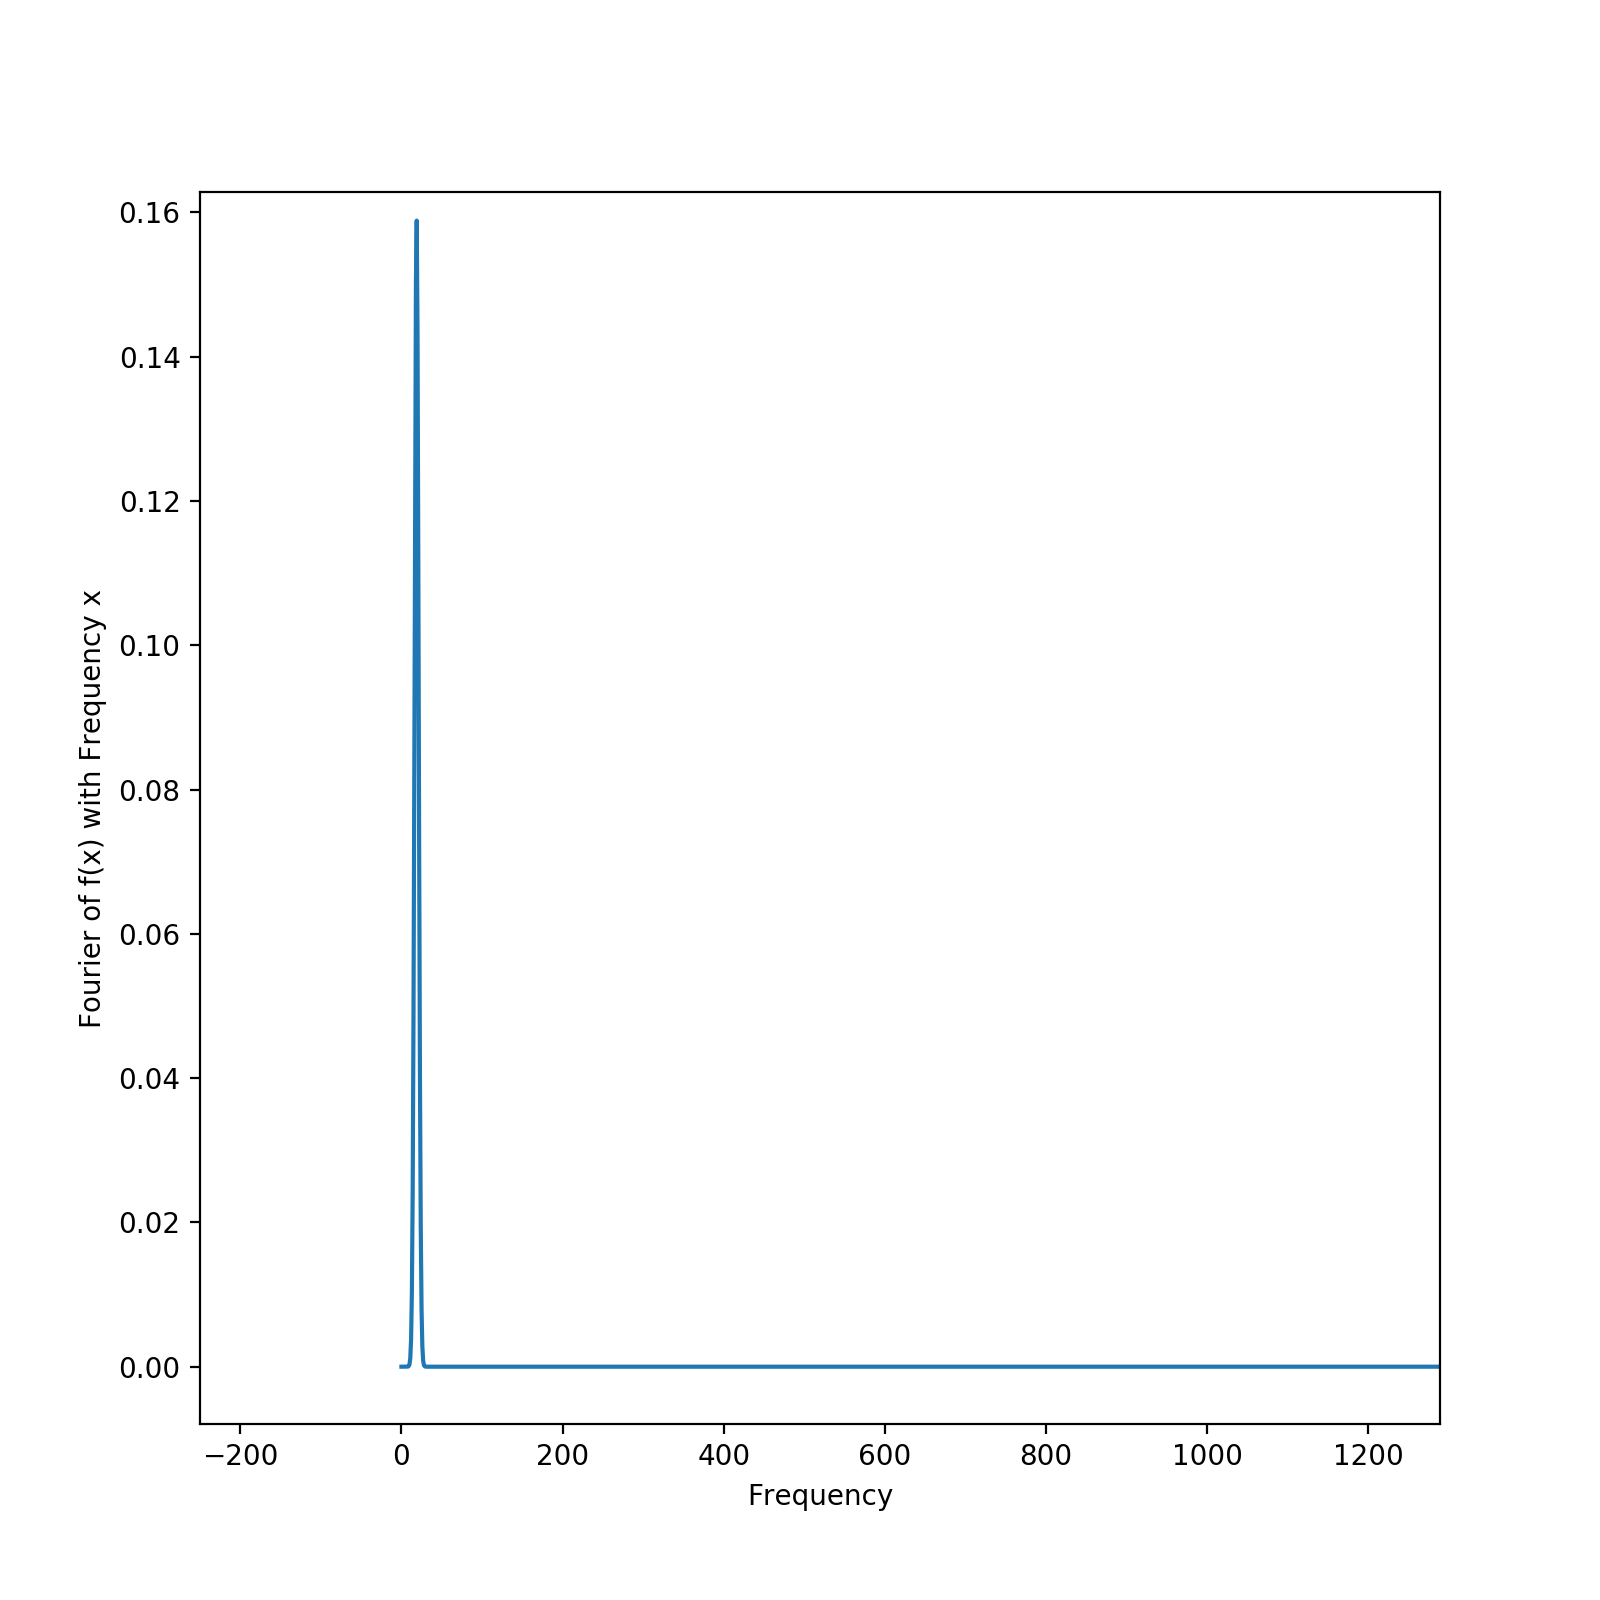

In [6]:
'''
Apply and graph the real part of the fourier transform, with some filters:
- First sort the values of the FFT by its frequency value in ascending order i.e. -N ... N
- Filter out negative frequency values, since we're not interested in those ones.
- Plot only the real part of these results.
'''

fft_fn_t = np.fft.fft(fn_t)
real_fft_fn_t = 2.0 * np.abs(fft_fn_t/n)
freqs = np.fft.fftfreq(n) * n

positive_freqs = freqs[:n//2]
positive_fft = real_fft_fn_t[:n//2]

mask = np.argsort(positive_freqs, axis=None)

print(positive_fft[mask])

fig= plt.figure(figsize=(8,8))
plt.xlabel("Frequency")
plt.ylabel("Fourier of f(x) with Frequency x")
plt.plot(positive_freqs[mask], positive_fft[mask].real)
plt.show()

In [7]:
'''
The following visualization is made to prove that we can get the original function should we decide to
apply an inverse Fourier transform.
'''

i_fft_fn_t = np.fft.ifft(fft_fn_t)

<IPython.core.display.Javascript object>


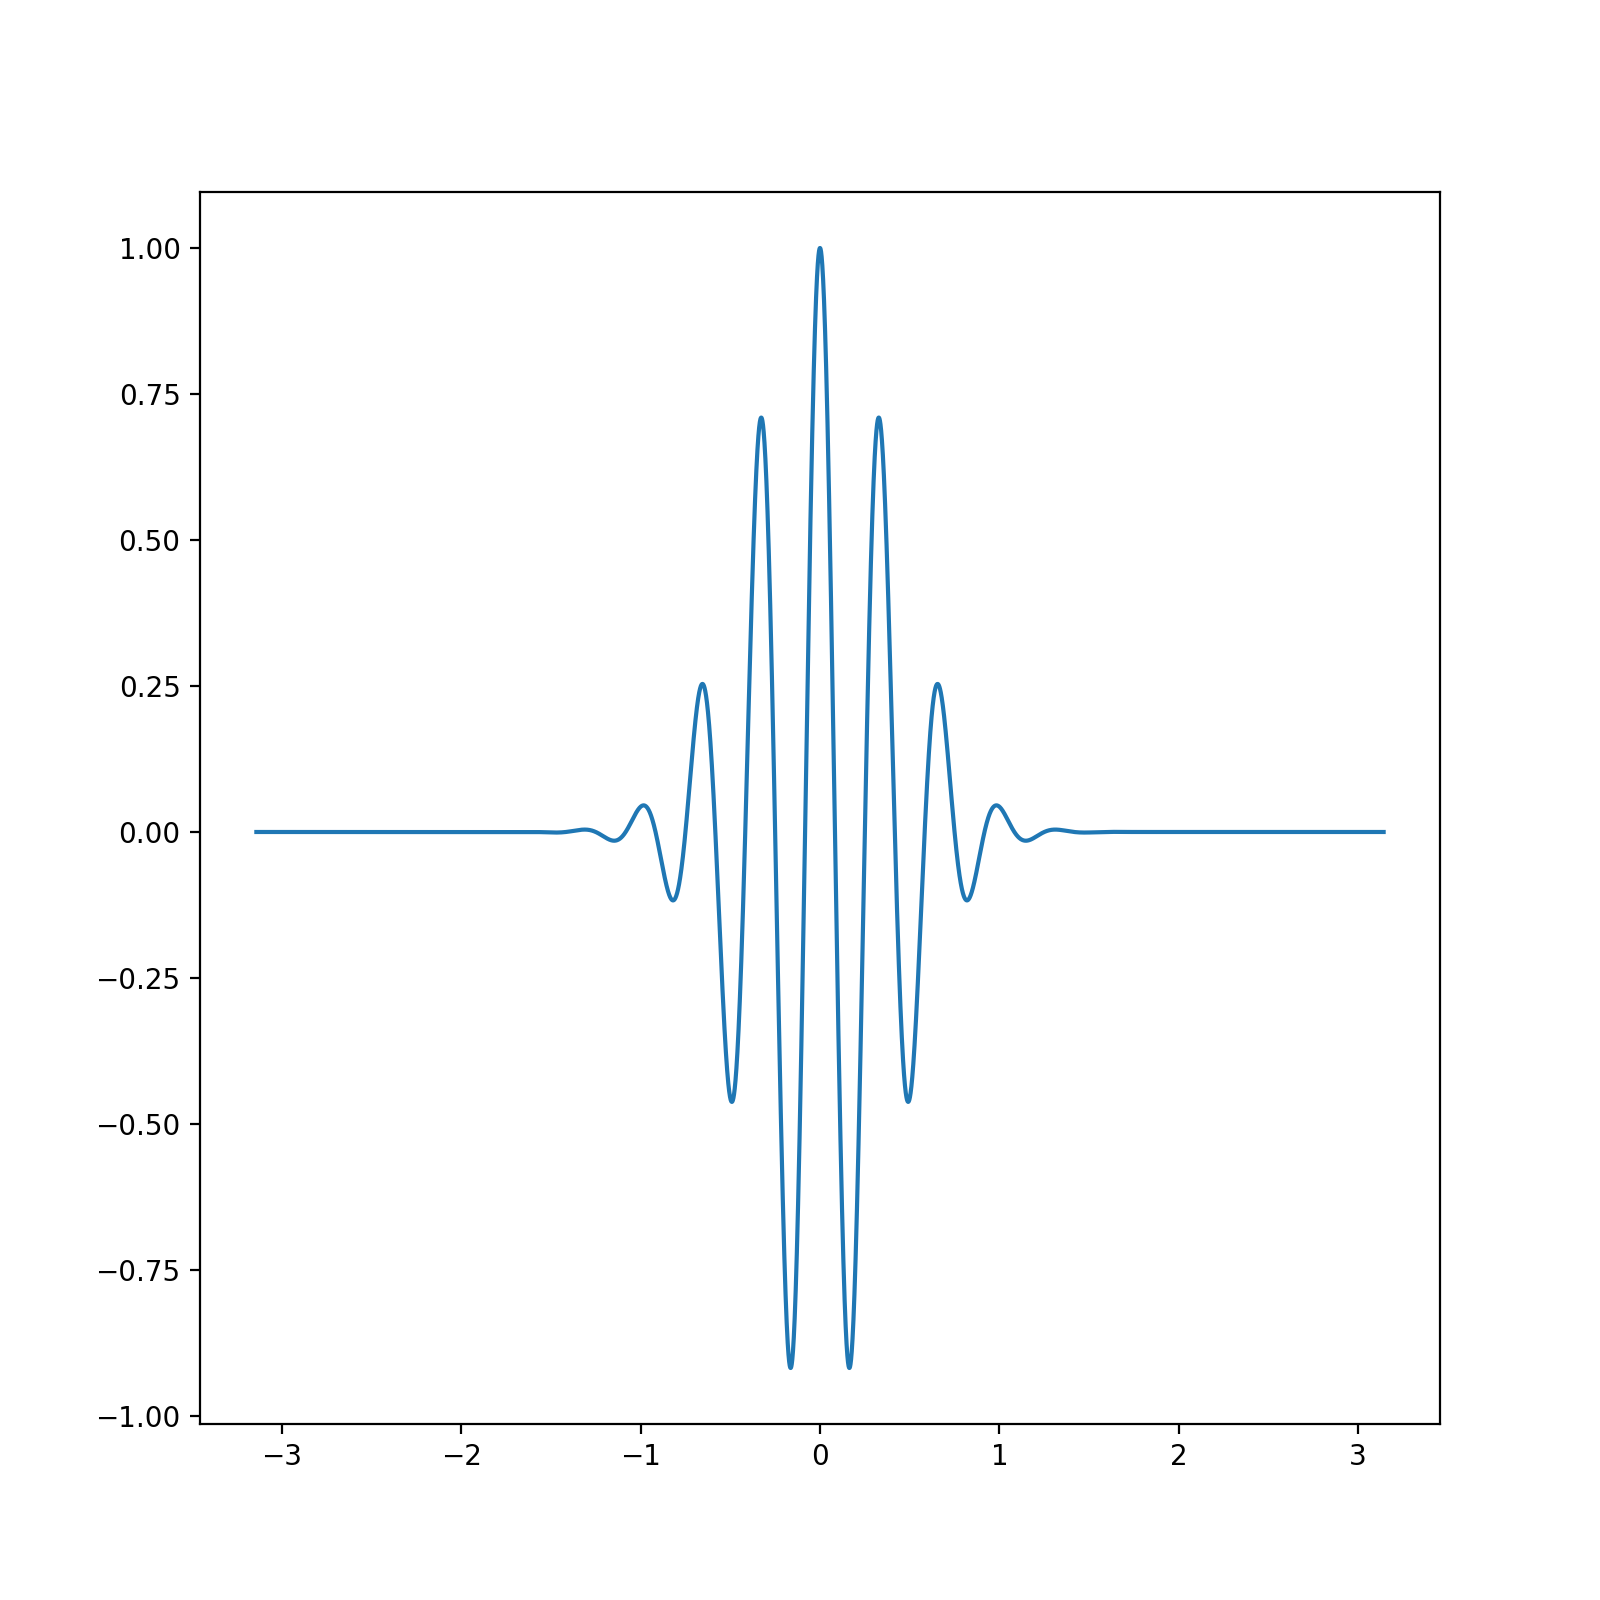

In [8]:
fig= plt.figure(figsize=(8,8))
plt.plot(t, i_fft_fn_t.real + i_fft_fn_t.imag)
plt.show()

Thank you so much for checking this notebook!
All comments, corrections and feedback are appreciated.

*If you have any questions, looking for someone to solve cool problems or something to say you can e-mail me at luiserick.zul@gmail.com*